$$H=-\sum_{i,j}Z_iZ_j-h\sum_{i}X_i

In [5]:
# transverse field ising chain
import numpy as np

sigma_x = [[0, 1], [1, 0]]
sigma_z = [[1, 0], [0, -1]]

def kron_N(ops):
    """对一组算符做张量积"""
    result = ops[0]
    for op in ops[1:]:
        result = np.kron(result, op)
    return result

def get_ising_hamiltonian(N, J=1.0, h=1.0):
    """构造横场Ising链哈密顿量"""
    sx = np.array([[0, 1], [1, 0]], dtype=float)
    sz = np.array([[1, 0], [0, -1]], dtype=float)
    id2 = np.eye(2)
    H = np.zeros((2**N, 2**N))
    # 最近邻Z_i Z_{i+1}
    for i in range(N-1):
        ops = [id2]*N
        ops[i] = sz
        ops[i+1] = sz
        H -= J * kron_N(ops)
    # 横场X_i
    for i in range(N):
        ops = [id2]*N
        ops[i] = sx
        H -= h * kron_N(ops)
    return H

# 例子: 4自旋系统
N = 4
J = 1.0
h = 1.0
H = get_ising_hamiltonian(N, J, h)
# 求解本征值/本征矢
eigvals, eigvecs = np.linalg.eigh(H)
ground_energy = eigvals[0]
ground_state = eigvecs[:, 0]
print("基态能量:", ground_energy)

基态能量: -4.7587704831436355


N=2, M=[0.019996001199600138, 0.05556521031338191, 0.15302883817974866, 0.3957150737821888, 0.7679504383806277, 0.9578942446942573, 0.9942480251463013, 0.9992514859365864, 0.9999032310878111, 0.9999875002343698]
N=4, M=[0.007501124855828405, 0.020893408822667558, 0.058587893001598904, 0.17210356137585756, 0.5593126186888794, 0.9314397693901193, 0.9912722982876622, 0.9988755469429006, 0.9998548185365606, 0.9999812498828168]
N=6, M=[0.006666770938007792, 0.01855265766359103, 0.05166881995446187, 0.14512830673777602, 0.4622683929323042, 0.9220066700348938, 0.9902792122044747, 0.9987502314794363, 0.9998386810141868, 0.999979166432289]
N=8, M=[0.006250093754101811, 0.017393016743715815, 0.04843512615624479, 0.13562954324501797, 0.41344415597355644, 0.9172500747733531, 0.9897826678031876, 0.9986875737476575, 0.9998306122529964, 0.9999781247070254]
N=8, M=[0.006250093754101811, 0.017393016743715815, 0.04843512615624479, 0.13562954324501797, 0.41344415597355644, 0.9172500747733531, 0.989782667

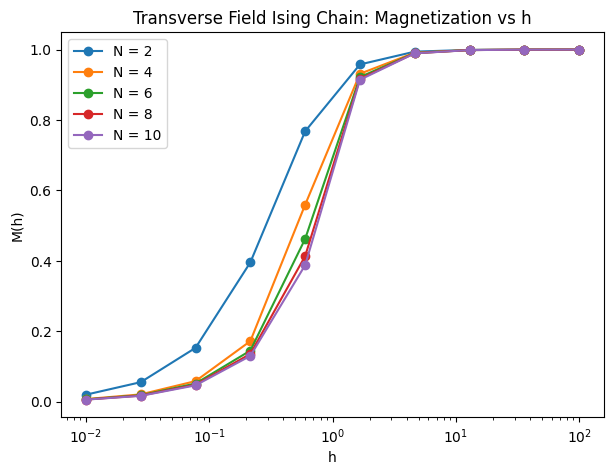

In [6]:
import matplotlib.pyplot as plt

def magnetization_x(ground_state, N):
    """计算基态在x方向的平均磁化强度"""
    sx = np.array([[0, 1], [1, 0]], dtype=float)
    id2 = np.eye(2)
    M = 0.0
    for i in range(N):
        ops = [id2]*N
        ops[i] = sx
        op = kron_N(ops)
        M += np.vdot(ground_state, op @ ground_state).real
    return M / N

hs = np.logspace(-2, 2, 10)
Ns = range(2, 12, 2)
plt.figure(figsize=(7,5))
for N in Ns:
    M = []
    for h in hs:
        H = get_ising_hamiltonian(N, J=1.0, h=h)
        eigvals, eigvecs = np.linalg.eigh(H)
        ground_state = eigvecs[:, 0]
        M.append(magnetization_x(ground_state, N))
    plt.plot(hs, M, marker='o', label=f"N = {N}")
    print(f"N={N}, M={M}")
plt.xscale('log')
plt.xlabel("h")
plt.ylabel("M(h)")
plt.legend()
plt.title("Transverse Field Ising Chain: Magnetization vs h")
plt.show()